In [2]:
# #Importing python libraries downloaded from the internet and those saved locally
# import serial 
# from serial.tools import list_ports
import os
os.chdir('/Users/Orlando/Documents/Github_clones/duckbot/notebooks') #Path where utils folder is stored

import yaml
import matplotlib
matplotlib.use('TkAgg') #This is a specific back end of matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv2
import time
import pandas as pd
import glob
import json
import datetime
from datetime import date
import ipywidgets as widgets
import threading


print(os.path.abspath(os.curdir))
# from utils.MachineUtils import * #Local library
# from utils.CameraUtils import * #Local library. #Note that this library requirs a package that can only be installed on raspbery pi. 
import utils.PlatePositionUtils as pp #Local library
# import utils.ImageCaptureUtils as im
import utils.PlatePositionUtils as pp #Local library

%matplotlib inline
import re
import PIL as Image
import matplotlib.image as mpimg



/Users/Orlando/Documents/Github_clones/duckbot/notebooks


In [3]:
#Directory that hosts experiment set up file
expt_setup_parent_dir = "/Users/Orlando/Documents/Github_clones/duckbot/test_expt_setupfiles/"
expt_setup_dir = 'TestDriveExpt_1_08032022/'
# '/home/pi/duckbot/test_expt_setupfiles/TestDriveExpt_1_08032022/'
expt_setup_path = expt_setup_parent_dir + expt_setup_dir


#Experimental set up file name, including .json
expt_setup_filename = 'TestDriveExpt_1_08032022.json'

#Host directory that you want to host the folder with your image files. End with forward slash
data_host_dir_path = "/Users/Orlando/Documents/Github_clones/duckbot/test_data/"
# '/home/pi/Documents/Data/'

#Name you want to use for the folder with your image files
data_dir = 'TestDriveExpt_1_08032022'
expt_name = 'TestDriveExpt_1_08032022' #Will be used as prefix for file names

#Where data will be saved
output_data_dir = data_host_dir_path + data_dir  

isExist = os.path.exists(output_data_dir)
if not isExist:
  # Create a new directory because it does not exist 
    os.makedirs(output_data_dir)
    print("The new directory is created!")
    
print("Image files will be saved to:")
print(output_data_dir)

Image files will be saved to:
/Users/Orlando/Documents/Github_clones/duckbot/test_data/TestDriveExpt_1_08032022


In [4]:
# df_with_well_coords = pp.add_well_coords_to_df_from_file(expt_setup_path, expt_setup_filename)

In [11]:
# print(df_with_well_coords)

   genotype        media  condition_replicate    plate_well_id    Plate Well  \
0    Lm8627   50 mM Salt                    4  Plate_1_Well_A1  Plate_1   A1   
1    Lm5500  150 mM Salt                    4  Plate_1_Well_A2  Plate_1   A2   
2    Lm5500   50 mM Salt                    1  Plate_1_Well_A3  Plate_1   A3   
3    Lm5500         Mock                    3  Plate_1_Well_A4  Plate_1   A4   
4    Lm8627         Mock                    2  Plate_1_Well_A5  Plate_1   A5   
5    Lm8627  150 mM Salt                    1  Plate_1_Well_A6  Plate_1   A6   
6    Lm8627  150 mM Salt                    4  Plate_1_Well_B1  Plate_1   B1   
7    Sp7498   50 mM Salt                    4  Plate_1_Well_B2  Plate_1   B2   
8    Sp7498         Mock                    3  Plate_1_Well_B3  Plate_1   B3   
9    Lm5500  150 mM Salt                    1  Plate_1_Well_B4  Plate_1   B4   
10   Lm5500         Mock                    1  Plate_1_Well_B5  Plate_1   B5   
11   Lm5500   50 mM Salt                

In [24]:


#     plates = list(np.unique(df_with_well_coords['Plate']))
#     print(plates)
#     # plates = [int(x[-1]) for x in plates]

#     media_list = list(np.unique(df_with_well_coords['media']))
#     print(media)

['Plate_1', 'Plate_2']
['150 mM Salt', '50 mM Salt', 'Mock']


In [53]:
#     c_num = 6 #How many columns per plate
#     r_num = 4 #How many rows per plate
#     date_today = "2022-08-09"

#     row_dict ={"A" : 1, "B" :2, "C": 3, "D": 4, "E" : 5, "F" : 6}
#     media_color_opts = ['lightcoral','lightblue','lightgreen','lightpurple','lightyellow','lightpink']
#     media_color_dict = {}
#     n = 0
#     for m in media_list:
#         media_color_dict[m] = media_color_opts[n]
#         n = n + 1

# print(media_color_dict)

{'150 mM Salt': 'lightcoral', '50 mM Salt': 'lightblue', 'Mock': 'lightgreen'}


In [103]:
# column_list = list(np.arange(0, c_num))
# row_list = list(np.arange(0,r_num))

In [107]:
# using the variable axs for multiple Axe
def visualize_plate_set_up(df_with_well_coords):
#     df_with_well_coords = pp.add_well_coords_to_df_from_file(expt_setup_path, expt_setup_filename)

    import matplotlib.patches as mpatches
    
    #Establish a number of variables to be called in the matplotlib function below
    plates = list(np.unique(df_with_well_coords['Plate']))
    media_list = list(np.unique(df_with_well_coords['media']))
    c_num = 6 #How many columns per plate
    r_num = 4 #How many rows per plate
    column_list = list(np.arange(0, c_num))
    row_list = list(np.arange(0,r_num))

    date_today = "2022-08-09"
    row_dict ={"A" : 1, "B" :2, "C": 3, "D": 4, "E" : 5, "F" : 6}
    media_color_opts = ['lightcoral','lightblue','lightgreen','lightpurple','lightyellow','lightpink']
    media_color_dict = {}
    n = 0
    for m in media_list:
        media_color_dict[m] = media_color_opts[n]
        n = n + 1
    
    #Set up visualization using matplotlib
    for p in plates:
        fig, axs = plt.subplots(r_num, c_num, figsize=(12, 8))
        plt.suptitle(f"Set up plan for {p}", fontsize = 16)
        plate_df = df_with_well_coords.loc[df_with_well_coords['Plate'] == p]
        for c in column_list:
            for r in row_list:
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
        leg_patches = []
        for m in media_color_dict:
            m_patch = mpatches.Patch(color= media_color_dict[m])
            leg_patches.append(m_patch)
            media_df = plate_df.loc[plate_df['media'] == m]
            c = media_color_dict[m]
            for index, row in media_df.iterrows():
                well = row['Well'] #Find the pattern, use 'group(0)'' to pull string from match object and then slice to get desired part
                duckweed = row['genotype']
                row = row_dict[well[0]] - 1 #Pull column number from dictionary above. Adjust to start at 0 instead of 1
                column = int(well[1]) - 1
                ax_n = axs[row, int(column)]
                circle1 = plt.Circle((0.5, 0.5), 0.4, color=c)
                ax_n.add_patch(circle1)
                ax_n.text(0.5, 0.5, duckweed, horizontalalignment='center', verticalalignment='center', transform=ax_n.transAxes, weight='bold')
                ax_n.text(0.1, 0.9, well, horizontalalignment='center', verticalalignment='center', transform=ax_n.transAxes, weight='bold')
        fig.legend(handles = leg_patches, labels = media_list, loc = 'upper left')



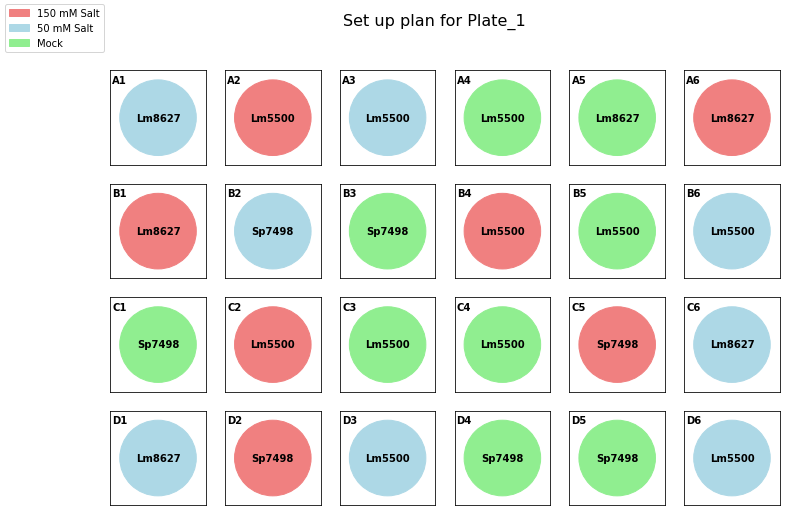

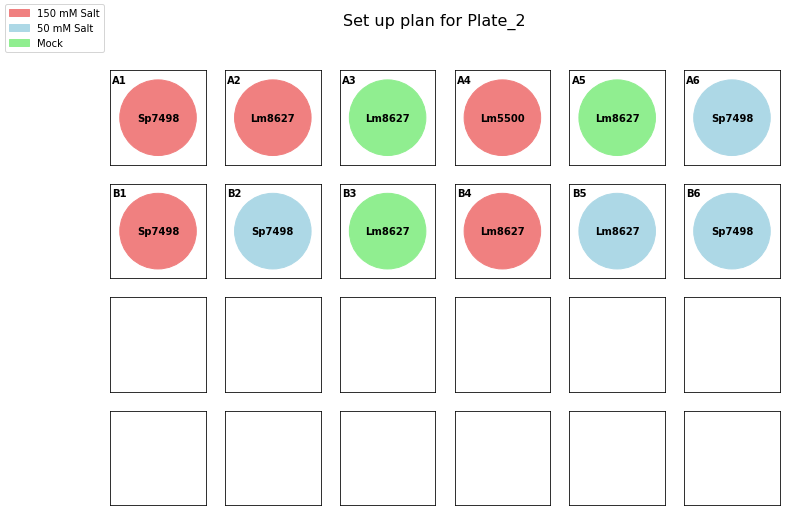

In [108]:
visualize_plate_set_up(expt_setup_path, expt_setup_filename)